In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

no null values in ths data set

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


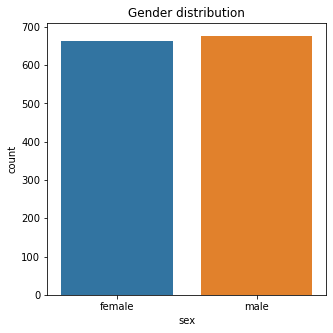

In [7]:
plt.figure(figsize=(5,5))
#style.use('ggplot')
sns.countplot(x='sex',data=df)
plt.title('Gender distribution')
plt.show()

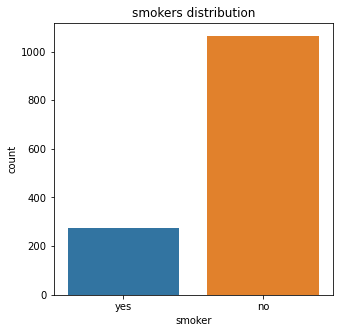

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=df)
plt.title('smokers distribution')
plt.show()

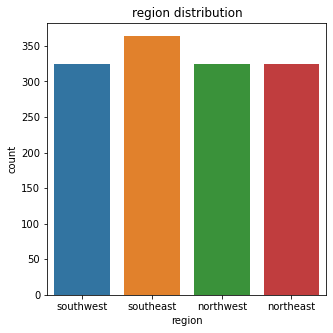

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=df)
plt.title('region distribution')
plt.show()

<AxesSubplot:xlabel='region', ylabel='charges'>

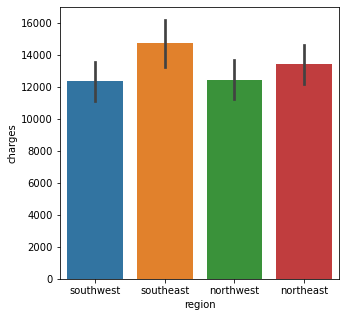

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
 

<AxesSubplot:xlabel='sex', ylabel='charges'>

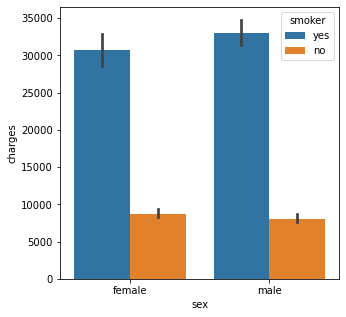

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',hue='smoker',data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

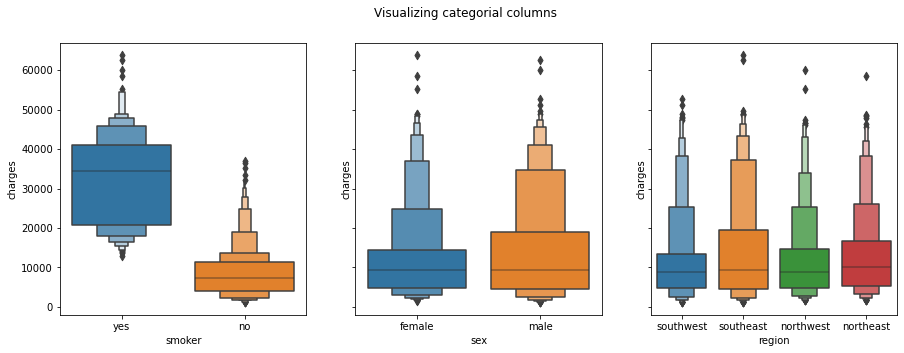

In [12]:
fig, axes=plt.subplots(1,3, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorial columns')
sns.boxenplot(x='smoker',y='charges',data=df,ax=axes[0])
sns.boxenplot(x='sex',y='charges',data=df,ax=axes[1])
sns.boxenplot(x='region',y='charges',data=df,ax=axes[2])

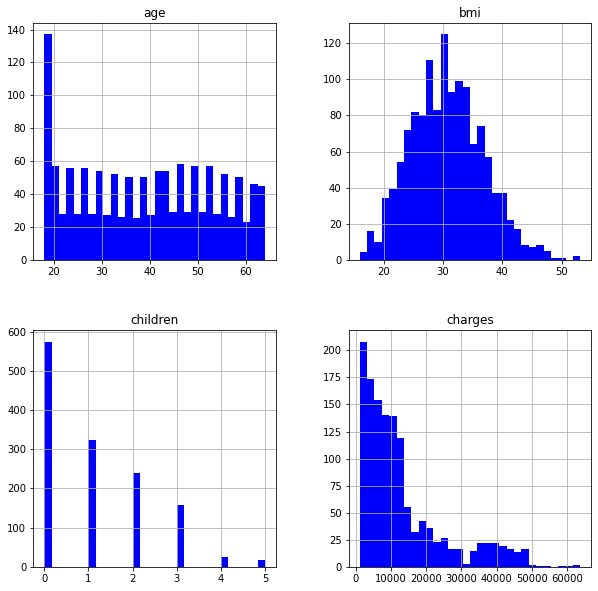

In [13]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

## CONVERTING categorial into numerical

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df['sex']=df['sex'].apply({'male':0, 'female':1}.get)

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [17]:
df['smoker']=df['smoker'].apply({'yes':1, 'no':0}.get)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [18]:
df['region']=df['region'].apply({'southwest':1,'southeast':2, 'northwest':3, 'northeast':4}.get)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


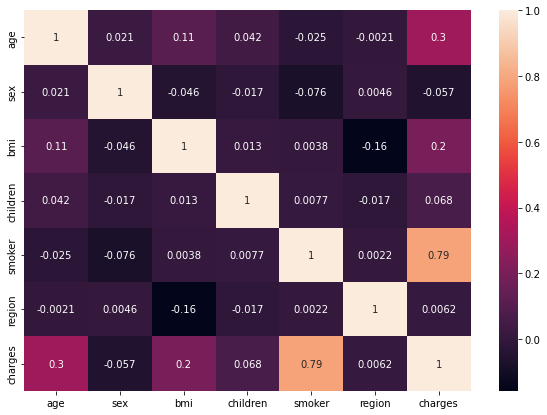

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [29]:
#plt.scatter(df.charges,df.smoker)
#plt.show()

smokers have very high corelation with charges
whereas sex has least corelation with charges

In [36]:
x=df.drop(['charges','sex'], axis=1)
y=df.charges

In [37]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [38]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [39]:
pred = linear.predict(x_test)

In [40]:
from sklearn.metrics import r2_score

In [42]:
print("R2 score is:",(r2_score(y_test,pred)))

R2 score is: 0.7697211527941854


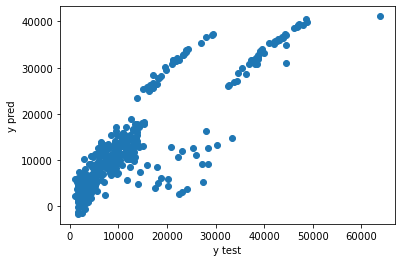

In [43]:
plt.scatter(y_test, pred)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.show()

In [47]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region': 2}
index=[0]
cust_df=pd.DataFrame(data,index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [48]:
cost_pred=linear.predict(cust_df)
print(cost_pred)

[33206.92756082]
